In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils import load_data, load_test_data
from utils import num_classes, epochs, batch_size

In [ ]:
X_train, y_train, X_valid, y_valid = load_data(test_size=0.2, img_size=224,Gray2RGB=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

In [ ]:
# a classic CNN model
model_name = 'classic_CNN_GlobalAveragePooling2D'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation(activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3),  padding='same', activation='relu'))
model.add(Activation(activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3),  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

#model.add(Dropout(0.5))
#model.add(Dropout(0.25))

# model.add(Flatten())

model.add(GlobalAveragePooling2D())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation(activation='softmax'))

print(model.summary())

In [12]:
# Data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0)

optimizer = keras.optimizers.Adam(lr=10e-6)#

model_path = './saved_models/CNN_051401.h5'.format(model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_acc', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_acc', patience=16, verbose=1)
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                                           factor=0.1,
                                           patience=3,
                                           min_lr=0.5e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])
# Fit the model on the batches generated by datagen.flow().
batch_size = 32
aug_ratio = 1
epochs = 400
steps_per_epoch = int(aug_ratio * X_train.shape[0] / batch_size)
validation_steps = int(aug_ratio * X_valid.shape[0] / batch_size)
model_history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size),
                                    epochs = epochs,
                                    validation_data = (X_valid, y_valid),
                                    callbacks = [checkpoint,earlystop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_steps=validation_steps)

Epoch 1/400
39/40 [============================>.] - ETA: 0s - loss: 1.4780 - acc: 0.3184
Epoch 00001: val_acc improved from -inf to 0.33746, saving model to ./saved_models/CNN_051401.h5
40/40 [==============================] - 11s 275ms/step - loss: 1.4748 - acc: 0.3191 - val_loss: 1.4868 - val_acc: 0.3375
Epoch 2/400
39/40 [============================>.] - ETA: 0s - loss: 1.4647 - acc: 0.3120
Epoch 00002: val_acc did not improve from 0.33746
40/40 [==============================] - 9s 228ms/step - loss: 1.4643 - acc: 0.3113 - val_loss: 1.4739 - val_acc: 0.3313
Epoch 3/400
39/40 [============================>.] - ETA: 0s - loss: 1.4725 - acc: 0.3309
Epoch 00003: val_acc did not improve from 0.33746
40/40 [==============================] - 9s 233ms/step - loss: 1.4709 - acc: 0.3320 - val_loss: 1.4688 - val_acc: 0.3375
Epoch 4/400
39/40 [============================>.] - ETA: 0s - loss: 1.4669 - acc: 0.3401
Epoch 00004: val_acc did not improve from 0.33746
40/40 [======================

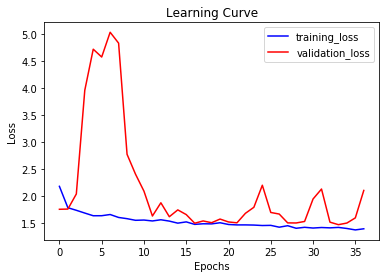

In [6]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, 'b', label="training_loss")
plt.plot(val_loss, 'r', label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

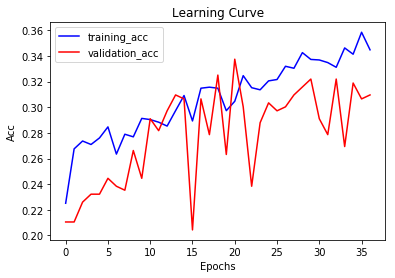

In [7]:
training_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.plot(training_acc, 'b', label="training_acc")
plt.plot(val_acc, 'r', label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(1290, 224, 224, 3)
(1290, 15)
(323, 224, 224, 3)
(323, 15)


In [9]:
X_test, X_id = load_test_data(Gray2RGB=True, img_size=360)
print(X_test.shape)

(438, 360, 360, 3)


In [10]:
print(X_valid.shape)

(323, 224, 224, 3)


In [11]:
model_path = './saved_models/CNN_051401.h5'.format(model_name)
model = load_model(model_path)

#scores = model.evaluate(X_valid, y_valid, verbose=1)
#print('Validation loss:', scores[0])
#print('Validation accuracy:', scores[1])

y_test_pred = model.predict_classes(X_test)
y_test_pred_df = pd.DataFrame({'id': np.array(X_id), 'class':y_test_pred}).sort_values(by='id')
y_test_pred_df.to_csv('CNN_051101.csv'.format(model_name), index=False)

ValueError: Error when checking input: expected conv2d_input to have shape (224, 224, 3) but got array with shape (360, 360, 3)

In [14]:
#X_train

In [ ]:
#X_test

In [ ]:
pp